## Basic approach

Aqui, implementaremos modelos baseados em regras para reconhecer os acordes. Os modelos encontram-se mais profundamente explicados no livro $\textit{Fundamentals of Music Processing Audio}$.

In [1]:
import os
import pandas as pd
import IPython.display as ipd
import librosa
import librosa.display
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
import copy

In [27]:
semitons = list(range(0,12))
semitons.extend(list(range(0,12)))
semitons

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [28]:
notes = ['C','Db','D','Eb','E','F','Gb','G','Ab','A','Bb','B']
# notes = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']
notes

['C', 'Db', 'D', 'Eb', 'E', 'F', 'Gb', 'G', 'Ab', 'A', 'Bb', 'B']

Carregando os audios para gerar os chromas:

In [13]:
file = '../corpus/generated_chords/audio/dim/Banjo/Adim_agogo-samba_Banjo.ogg'
y, sr = librosa.load(file)

In [14]:
y

array([ 5.1959658e-05,  1.2853998e-04,  1.6941568e-04, ...,
        1.0697712e-06, -1.9205786e-06,  1.3681599e-06], dtype=float32)

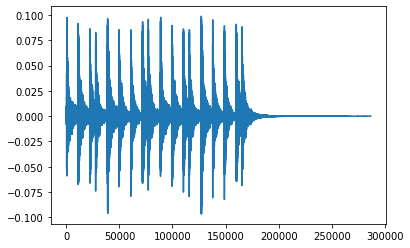

In [15]:
plt.plot(y)

In [16]:
N = len(y)
chroma = librosa.feature.chroma_stft(y=y, 
                                        sr=sr, 
                                        tuning=0.0, 
                                        norm=0, 
                                        hop_length=N+1, 
                                        n_fft=N
                                    )

In [17]:
chroma.shape

(12, 1)

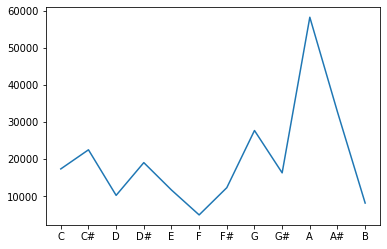

<Figure size 432x288 with 0 Axes>

In [18]:
plt.plot(['C','C#','D','D#','E','F','F#','G','G#','A','A#','B'],
          chroma);

# plt.title(chord);
plt.show()
plt.clf()

In [20]:
chroma/chroma.max()

array([[0.29752555],
       [0.38602063],
       [0.17503709],
       [0.32669112],
       [0.1999008 ],
       [0.0844837 ],
       [0.21065384],
       [0.47544086],
       [0.27929345],
       [1.        ],
       [0.56106704],
       [0.13943985]], dtype=float32)

Nomes dos acordes:

In [59]:
acordes_7 = [note + '7' for note in notes]
acordes_dim = [note + 'dim' for note in notes]
acordes_maj7 = [note + 'maj7' for note in notes]
acordes_meio_dim = [note + 'meio_dim' for note in notes]
acordes_min7 = [note + 'min7' for note in notes]

#### Definindo os chromas "perfeitos" de cada acorde

Acordes <font color ='red'> maiores </font> com sétima <font color ='red'> maior </font> (maj7)

In [48]:
dict_maj7 = {}
for i in list(range(12)):
    
    # definindo cada nota do acorde a partir dos intervalos, em semitons
    fundamental = 0 + i
    terca = fundamental + 4
    quinta = fundamental + 7
    setima = fundamental + 11

    # mapeando cada nota do acorde a partir da sua distância (em semitons) da nota dó
    i_fund = semitons[fundamental]
    i_terca = semitons[terca]
    i_quinta = semitons[quinta]
    i_setima = semitons[setima]


    acorde_list = [i_fund, 
                   i_terca, 
                   i_quinta, 
                   i_setima]

    # definindo o chroma
    acorde_chroma = np.zeros(12)
    acorde_chroma[acorde_list] = 1
    

    chord = acordes_maj7[i]
    dict_maj7[chord] = acorde_chroma

In [51]:
#dict_maj7

Acordes <font color ='red'> maiores </font> com sétima <font color ='blue'> menor </font> (7)

In [52]:
dict_7 = {}
for i in list(range(12)):
    
    # definindo cada nota do acorde a partir dos intervalos, em semitons
    fundamental = 0 + i
    terca = fundamental + 4
    quinta = fundamental + 7
    setima = fundamental + 10

    # mapeando cada nota do acorde a partir da sua distância (em semitons) da nota dó
    i_fund = semitons[fundamental]
    i_terca = semitons[terca]
    i_quinta = semitons[quinta]
    i_setima = semitons[setima]


    acorde_list = [i_fund, 
                   i_terca, 
                   i_quinta, 
                   i_setima]

    # definindo o chroma
    acorde_chroma = np.zeros(12)
    acorde_chroma[acorde_list] = 1
    

    chord = acordes_7[i]
    dict_7[chord] = acorde_chroma

In [53]:
dict_7

{'C7': array([1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 'Db7': array([0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.]),
 'D7': array([1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.]),
 'Eb7': array([0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.]),
 'E7': array([0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.]),
 'F7': array([1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.]),
 'Gb7': array([0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.]),
 'G7': array([0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1.]),
 'Ab7': array([1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.]),
 'A7': array([0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.]),
 'Bb7': array([0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.]),
 'B7': array([0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1.])}

Acordes <font color ='blue'> menores </font> com sétima <font color ='blue'> menor </font> (min7)

In [54]:
dict_min7 = {}
for i in list(range(12)):
    
    # definindo cada nota do acorde a partir dos intervalos, em semitons
    fundamental = 0 + i
    terca = fundamental + 3
    quinta = fundamental + 7
    setima = fundamental + 10

    # mapeando cada nota do acorde a partir da sua distância (em semitons) da nota dó
    i_fund = semitons[fundamental]
    i_terca = semitons[terca]
    i_quinta = semitons[quinta]
    i_setima = semitons[setima]


    acorde_list = [i_fund, 
                   i_terca, 
                   i_quinta, 
                   i_setima]

    # definindo o chroma
    acorde_chroma = np.zeros(12)
    acorde_chroma[acorde_list] = 1
    

    chord = acordes_min7[i]
    dict_min7[chord] = acorde_chroma

In [55]:
dict_min7

{'Cmin7': array([1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.]),
 'Dbmin7': array([0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.]),
 'Dmin7': array([1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.]),
 'Ebmin7': array([0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.]),
 'Emin7': array([0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.]),
 'Fmin7': array([1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.]),
 'Gbmin7': array([0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.]),
 'Gmin7': array([0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.]),
 'Abmin7': array([0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1.]),
 'Amin7': array([1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.]),
 'Bbmin7': array([0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.]),
 'Bmin7': array([0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1.])}

Acordes <font color ='green'> diminutos </font>

In [56]:
dict_dim = {}
for i in list(range(12)):
    
    # definindo cada nota do acorde a partir dos intervalos, em semitons
    fundamental = 0 + i
    terca = fundamental + 3
    quinta = fundamental + 6
    setima = fundamental + 9

    # mapeando cada nota do acorde a partir da sua distância (em semitons) da nota dó
    i_fund = semitons[fundamental]
    i_terca = semitons[terca]
    i_quinta = semitons[quinta]
    i_setima = semitons[setima]


    acorde_list = [i_fund, 
                   i_terca, 
                   i_quinta, 
                   i_setima]

    # definindo o chroma
    acorde_chroma = np.zeros(12)
    acorde_chroma[acorde_list] = 1
    

    chord = acordes_dim[i]
    dict_dim[chord] = acorde_chroma

In [57]:
dict_dim

{'Cdim': array([1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.]),
 'Dbdim': array([0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 'Ddim': array([0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.]),
 'Ebdim': array([1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.]),
 'Edim': array([0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 'Fdim': array([0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.]),
 'Gbdim': array([1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.]),
 'Gdim': array([0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 'Abdim': array([0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.]),
 'Adim': array([1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.]),
 'Bbdim': array([0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 'Bdim': array([0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.])}

Acordes <font color ='green'> meio diminutos </font>

In [60]:
dict_meio_dim = {}
for i in list(range(12)):
    
    # definindo cada nota do acorde a partir dos intervalos, em semitons
    fundamental = 0 + i
    terca = fundamental + 3
    quinta = fundamental + 6
    setima = fundamental + 10

    # mapeando cada nota do acorde a partir da sua distância (em semitons) da nota dó
    i_fund = semitons[fundamental]
    i_terca = semitons[terca]
    i_quinta = semitons[quinta]
    i_setima = semitons[setima]


    acorde_list = [i_fund, 
                   i_terca, 
                   i_quinta, 
                   i_setima]

    # definindo o chroma
    acorde_chroma = np.zeros(12)
    acorde_chroma[acorde_list] = 1
    

    chord = acordes_meio_dim[i]
    dict_meio_dim[chord] = acorde_chroma

In [61]:
dict_meio_dim

{'Cmeio_dim': array([1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.]),
 'Dbmeio_dim': array([0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.]),
 'Dmeio_dim': array([1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.]),
 'Ebmeio_dim': array([0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.]),
 'Emeio_dim': array([0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 'Fmeio_dim': array([0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.]),
 'Gbmeio_dim': array([1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.]),
 'Gmeio_dim': array([0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.]),
 'Abmeio_dim': array([0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1.]),
 'Ameio_dim': array([1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.]),
 'Bbmeio_dim': array([0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.]),
 'Bmeio_dim': array([0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1.])}

In [64]:
dict_chords = {**dict_maj7, **dict_7, **dict_min7, **dict_dim, **dict_meio_dim}
dict_chords

{'Cmaj7': array([1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.]),
 'Dbmaj7': array([1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.]),
 'Dmaj7': array([0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.]),
 'Ebmaj7': array([0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0.]),
 'Emaj7': array([0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.]),
 'Fmaj7': array([1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.]),
 'Gbmaj7': array([0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.]),
 'Gmaj7': array([0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.]),
 'Abmaj7': array([1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.]),
 'Amaj7': array([0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.]),
 'Bbmaj7': array([0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.]),
 'Bmaj7': array([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.]),
 'C7': array([1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 'Db7': array([0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.]),
 'D7': array([1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.])